# <b>Introdução</b>

### Análise exploratória dos dados

Trabalharemos com um conjunto de dados real, a avaliação de diversos filmes por usuários da internet, do MovieLens. O site abriga variações destes dados, que podem ser baixados sob licença de uso. Existem versões de 20 milhões, 100 mil, 27 milhões de notas (ratings) para filmes, e por aí vai.

Neste curso optaremos pelo arquivo contendo 100 mil. Cada versão disponibilizada pelo site é atualizada periodicamente, então, se baixarmos uma delas hoje, provavelmente dali um tempo o mesmo arquivo terá notas e filmes diferentes. Isso porque trata-se de uma amostra aleatória para análise. 

In [2]:
import pandas as pd

In [8]:
notas = pd.read_csv('dados/ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
notas.shape #índice não conta como uma coluna

(100836, 4)

#### <b> Renomeando colunas </b>

In [13]:
notas.columns = ['usuárioId', 'filmeId', 'nota' , 'momento']
notas.head()

,usuárioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#### <b> Exibindo todas as notas únicas </b>
Interessante ressaltar que não há notas 0

In [16]:
notas.nota.unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

#### <b> Contanto a quantidade de cada nota </b>

In [18]:
notas.nota.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

### <b>Média das notas</b>

In [21]:
notas.nota.mean()

3.501556983616962

## <b> 2 - Visualizando dados com histograma e boxplot </b>

#### Plotando diretamente com o pandas
- Muito complicado interpretar esse gráfico.

<AxesSubplot:>

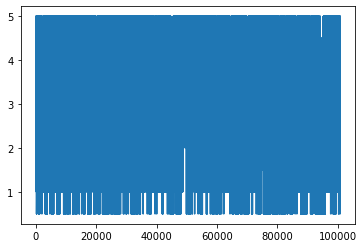

In [25]:
notas.nota.plot()

#### <b> Histograma </b>

- Analisando o histograma, perceberemos que a nota 5 apareceu diversas vezes; a nota 4,5 nem tantas; a nota 4 é a que mais apareceu.

<AxesSubplot:ylabel='Frequency'>

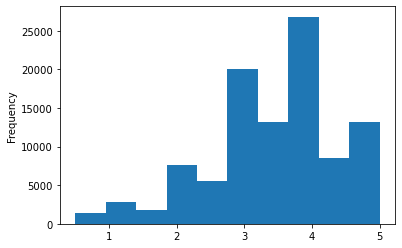

In [27]:
notas.nota.plot(kind= 'hist')

#### <b> Descrevendo os dados </b>

In [28]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

#### <b> Importando a biblioteca seaborn</b>

In [60]:
import seaborn as sns


#### <b> Plotando o 'describe' </b>

- Nessa visualização é possível identificar que metade das pessoas estão atribuindo notas
entre 3 e 4.
- 25 % entre 4 e 5.
- O restante está abaixo de 3.


c:\Users\marcu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

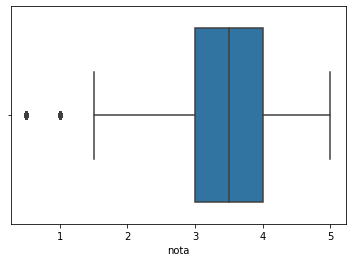

In [30]:
sns.boxplot(notas.nota)

## <b> 3 - Análise exploratória dos dados </b>
#### <b> Carregando arquivo dos filmes </b>

In [32]:
filmes = pd.read_csv('dados/movies.csv')

In [33]:
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### <b> Renomeando as colunas </b>

In [36]:
filmes.columns = ['filmesId', 'titulo', 'genero']
filmes

,filmesId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


#### <b>Filtrando avaliações do filme id 1 (Query) </b>

In [40]:
notas.query('filmeId == 1')

,usuárioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


#### <b> Extraindo média dos filmes </b>
- Importante salientar que a média do filme Toy Story  está acima da média geral.

In [42]:
notas.query('filmeId == 1').nota.mean()

3.9209302325581397

#### <b>Agrupando os filmes e extraindo a média</b>

In [53]:
medias_por_filme = notas.groupby('filmeId').mean()['nota']

In [55]:
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

#### <b>Analisando as distribuições das médias</b>

<AxesSubplot:ylabel='Frequency'>

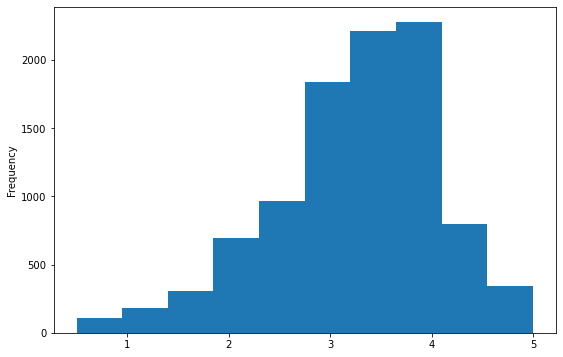

In [80]:
plt.figure(figsize=(9, 6))
medias_por_filme.plot(kind='hist') #histograma

<AxesSubplot:ylabel='nota'>

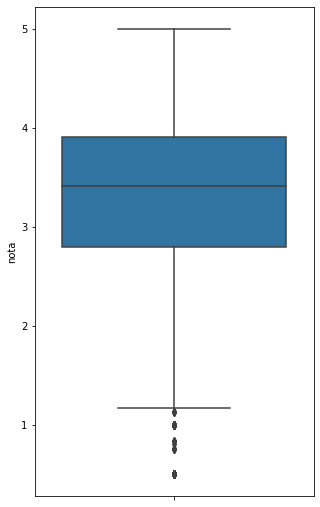

In [78]:
import matplotlib.pyplot as plt #Importando matplotlib aqui apenas para ilustrar que usa o matplotlib "por trás dos panos"

plt.figure(figsize=(5, 9))
sns.boxplot(y = medias_por_filme)



In [62]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

<Figure size 1080x792 with 0 Axes>

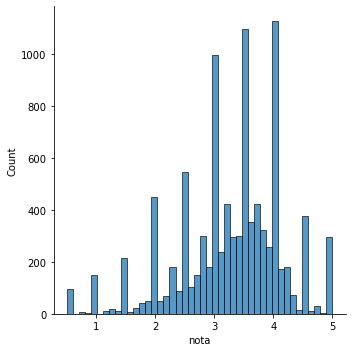

In [86]:
plt.figure(figsize=(15, 11))
sns.displot(medias_por_filme)


#### <b>Importando matplotlib</b>

In [67]:
import matplotlib.pyplot as plt

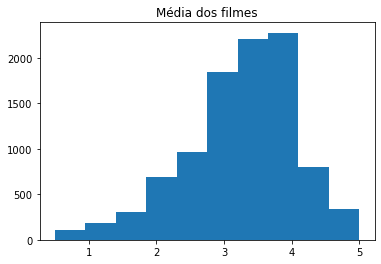

In [71]:
plt.hist(medias_por_filme)
plt.title("Média dos filmes")
plt.show()